In [5]:
!apt-get install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


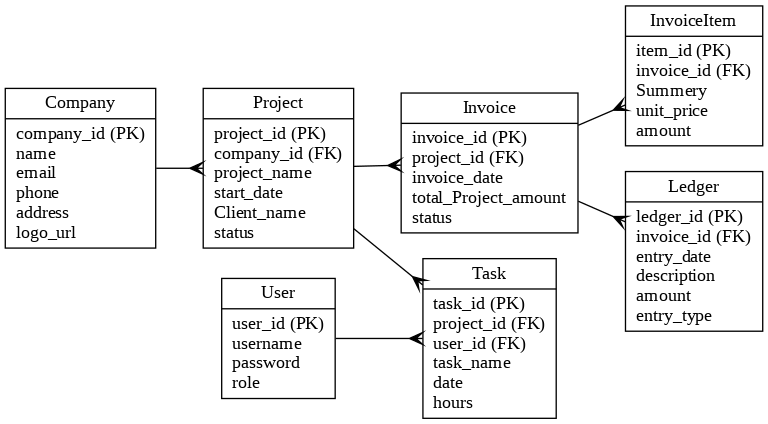

In [13]:
from graphviz import Digraph
from IPython.display import Image

# Create a new Digraph
erd = Digraph(name="Invoice_ERD", format='png')
erd.attr(rankdir='LR', size='8,8')

# Define nodes for entities
entities = {
    "Company": ["company_id (PK)", "name", "email", "phone", "address", "logo_url"],
    "Project": ["project_id (PK)", "company_id (FK)", "project_name", "start_date", "Client_name", "status"],
    "Invoice": ["invoice_id (PK)", "project_id (FK)", "invoice_date",  "total_Project_amount", "status"],
    "InvoiceItem": ["item_id (PK)", "invoice_id (FK)", "Summery", "unit_price", "amount"],
    "Task": ["task_id (PK)", "project_id (FK)", "user_id (FK)", "task_name", "date", "hours"],
    "User": ["user_id (PK)", "username", "password", "role"],
    "Ledger": ["ledger_id (PK)", "invoice_id (FK)", "entry_date", "description", "amount", "entry_type"]
}


# Add entity nodes with attributes
for entity, attributes in entities.items():
    label = f"{entity}|" + "\\l".join(attributes) + "\\l"
    erd.node(entity, label=label, shape="record")

# Define relationships
relationships = [
    ("Company", "Project"),
    ("Project", "Invoice"),
    ("Invoice", "InvoiceItem"),
    ("Invoice", "Ledger"),
    ("Project", "Task"),
    ("User", "Task")
]



# Add edges to the graph
for from_entity, to_entity in relationships:
    erd.edge(from_entity, to_entity, arrowhead="crow", dir="forward")

# Render and display image
erd.render(filename='invoice_erd', format='png', cleanup=True)
Image(filename='invoice_erd.png')


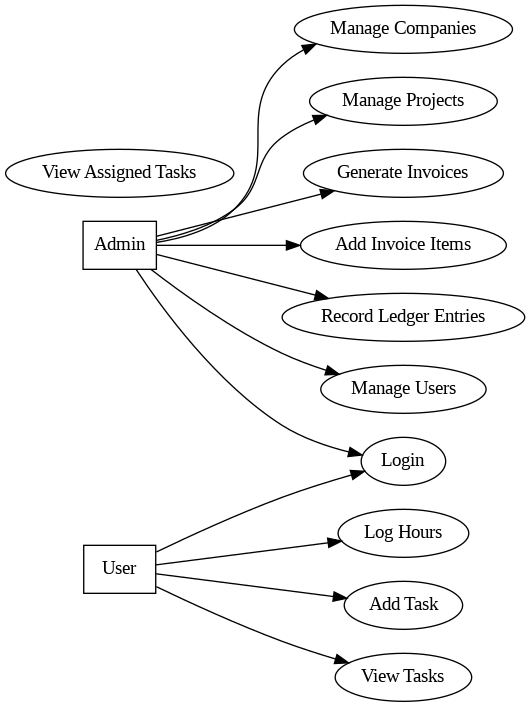

In [2]:
from graphviz import Digraph
from IPython.display import Image

use_case = Digraph(name="Use_Case_Invoice", format='png')
use_case.attr(rankdir='LR', size='10,8')

# Define actors
use_case.node("Admin", shape="actor")
use_case.node("User", shape="actor")

# Use Cases
use_cases = [
    "Login",
    "Manage Companies",
    "Manage Projects",
    "Generate Invoices",
    "Add Invoice Items",
    "Record Ledger Entries",
    "Manage Users",
    "Log Hours",
    "Add Task"  # Newly added use case
]

for case in use_cases:
    use_case.node(case, shape="ellipse")

# Edges for Admin (Removed 'Assign Tasks')
admin_use_cases = [
    "Login",
    "Manage Companies",
    "Manage Projects",
    "Generate Invoices",
    "Add Invoice Items",
    "Record Ledger Entries",
    "Manage Users"
]
for case in admin_use_cases:
    use_case.edge("Admin", case)

# Edges for User (Added 'Add Task')
user_use_cases = ["Login" , "Add Task", "View Tasks", "Log Hours"]
for case in user_use_cases:
    use_case.edge("User", case)

# Render and display image
use_case.render(filename='use_case_invoice', format='png', cleanup=True)
Image(filename='use_case_invoice.png')
